# Amazon electronics dataset exploration

## 2018 Amazon Review Data

A subset of the Amazon Review Data (2018), the electronics category data is roughly 20M engagements from Amazon users.  

*Source*: Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019, https://nijianmo.github.io/amazon/index.html

In [34]:
!ls ../data/2018

Electronics.csv


In [30]:
import pandas as pd
df = pd.read_csv('../data/2018/Electronics.csv', nrows=10000, names=["item", "user", "rating", "timestamp"])

Ratings only: These datasets include no metadata or reviews, but only (item,user,rating,timestamp) tuples. Thus they are suitable for use with mymedialite (or similar) packages.

In [31]:
df.head()

,item,user,rating,timestamp
0,0060009810,A1N070NS9CJQ2I,5.0,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.0,1025913600
2,0060009810,A192HO2ICJ75VU,5.0,1025654400
3,0060009810,A2T278FKFL3BLT,4.0,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.0,1025222400


In [32]:
len(df)

10000

Hmm... are the four columns sufficient for our system? Can we infer a purchase based on the presence of a rating? Do we assume a user with no rating for a product failed to purchase? Yeesh... that doesn't seem supportable. I guess the prediction here is not whether they bought it but whether they were motivated to source a review. Here the review becomes the reward, not the sale ... go off and read the paper: https://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf

In [17]:
df.describe()

,rating,timestamp
count,2.099435e+07,2.099435e+07
mean,4.073685e+00,1.425967e+09
std,1.385792e+00,7.769201e+07
min,1.000000e+00,8.811936e+08
25%,4.000000e+00,1.394064e+09
50%,5.000000e+00,1.440634e+09
75%,5.000000e+00,1.478736e+09
max,5.000000e+00,1.538698e+09


In [16]:
df.item.value_counts()

item
B010OYASRG    28539
B00L0YLRUW    20873
B00DIF2BO2    17045
B006GWO5WK    16130
B003L1ZYYW    16056
              ...  
B00GXO0W5K        1
B00GXOIMF2        1
B00A8ZGSOE        1
B003ZTYGMG        1
B01HJF4DUG        1
Name: count, Length: 756489, dtype: int64

## 2023 Amazon Reviews Data

### Preprocessing

In [1]:
!ls -lh ../data/2023

total 35G
-rw-rw-r-- 1 grim grim  22G Jul 19 10:34 Electronics.jsonl
-rw-rw-r-- 1 grim grim 4.5G Jul 19 13:44 Electronics_max.jsonl
-rw-rw-r-- 1 grim grim 1.1G Jul 19 13:27 Electronics_min.jsonl
-rw-rw-r-- 1 grim grim 4.9G Jul 19 10:34 meta_Electronics.jsonl
-rw-rw-r-- 1 grim grim 2.8G Jul 19 13:32 meta_Electronics_min.jsonl
-rw-rw-r-- 1 grim grim  65M Jul 19 13:11 test.jsonl
-rw-rw-r-- 1 grim grim 1.1M Jul 19 13:00 test_min.jsonl
-rw-rw-r-- 1 grim grim 2.0K Jul 19 13:11 tiny.jsonl
-rw-rw-r-- 1 grim grim  109 Jul 19 13:12 tiny_min.jsonl


2023 publication, see https://amazon-reviews-2023.github.io/

In [2]:
import json 
import pandas as pd

In [4]:
reviews = pd.read_json('../data/2023/Electronics.jsonl', lines=True, nrows=100, )

In [5]:
reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,[{'small_image_url': 'https://m.media-amazon.c...,B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-07-18 22:58:37.948,0,True
1,1,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-06-20 18:42:29.731,0,True
2,5,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:23:37.534,0,True
3,5,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,2010-11-20 18:41:35.000,18,True
4,5,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2023-02-17 02:39:41.238,0,True


In [ ]:
# We need to reduce the size of this dataset or risk blowing our memory budget, filter down to essentials for our prediction task 
!cd ../data/2023 && jq -c '{rating, parent_asin, user_id, timestamp}' Electronics.jsonl > Electronics_min.jsonl

In [3]:
reviews = pd.read_json('../data/2023/Electronics_min.jsonl', lines=True)

In [4]:
reviews.to_parquet("../data/2023/Electronics_min.parquet")

In [17]:
reviews.iloc[0]

rating                                    3
parent_asin                      B083NRGZMM
user_id        AFKZENTNBQ7A7V7UXW5JJI6UGRYQ
timestamp        2022-07-18 22:58:37.948000
Name: 0, dtype: object

In [18]:
len(reviews.user_id.unique())

2294450

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

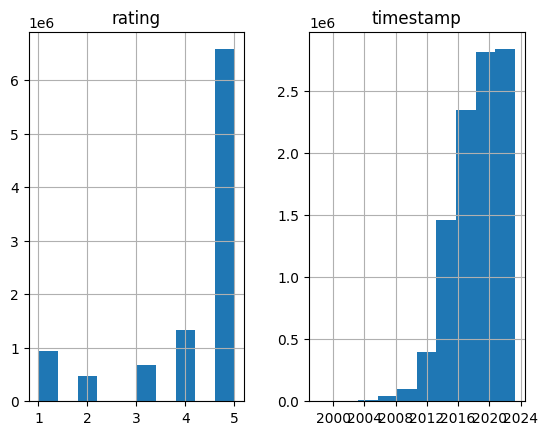

In [19]:
reviews.hist()

In [20]:
items = pd.read_json("../data/2023/meta_Electronics.jsonl", lines=True, nrows=100) 

In [21]:
items.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Electronics,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[],[Teleporter V3 The “Teleporter V3” kit sets a ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Fat Shark,"[Electronics, Television & Video, Video Glasses]","{'Date First Available': 'August 2, 2014', 'Ma...",B00MCW7G9M,NaN
1,All Electronics,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,"[UPC: 662774021904, Weight: 0.600 lbs]",[HDMI In - HDMI Out],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],SIIG,"[Electronics, Television & Video, Accessories,...",{'Product Dimensions': '0.83 x 4.17 x 2.05 inc...,B00YT6XQSE,NaN
2,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[WARNING: Please IDENTIFY MODEL NUMBER on the ...,[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'AL 2Sides Video', 'url': 'https://...",Digi-Tatoo,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Digi-Tatoo', 'Color': 'Fresh Marble...",B07SM135LS,NaN
3,AMAZON FASHION,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[☛NotoCity 22mm band is designed for Vivoactiv...,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],NotoCity,"[Electronics, Wearable Technology, Clips, Arm ...","{'Date First Available': 'May 29, 2020', 'Manu...",B089CNGZCW,NaN
4,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,"[New Droid X Essentials Combo Pack, Exclusive ...",[all Genuine High Quality Motorola Made Access...,14.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Verizon,"[Electronics, Computers & Accessories, Compute...",{'Product Dimensions': '11.6 x 6.9 x 3.1 inche...,B004E2Z88O,NaN


In [25]:
# Filter down to essential fields
!cd ../data/2023 && jq -c '{title, average_rating, description, price, images, rating_number, parent_asin}' meta_Electronics.jsonl > meta_Electronics_min.jsonl

In [1]:
import pandas as pd

In [2]:
# Note this for whatever reason burns about 30G of RAM during the load, even though the json is only 2.8G uncompressed, we should get this into a parquet file stat
items = pd.read_json("../data/2023/meta_Electronics.jsonl", lines=True)

In [ ]:
items.drop(['main_category', 'features', 'videos', 'store', 'categories', 'details', 'bought_together', 'subtitle', 'author'], axis=1, inplace=True)

Signature:
items.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or l

In [20]:
items.head()

,title,average_rating,rating_number,description,price,images,parent_asin
0,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[Teleporter V3 The “Teleporter V3” kit sets a ...,None,[{'thumb': 'https://m.media-amazon.com/images/...,B00MCW7G9M
1,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,[HDMI In - HDMI Out],None,[{'thumb': 'https://m.media-amazon.com/images/...,B00YT6XQSE
2,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,B07SM135LS
3,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,B089CNGZCW
4,Motorola Droid X Essentials Combo Pack,3.8,64,[all Genuine High Quality Motorola Made Access...,14.99,[{'thumb': 'https://m.media-amazon.com/images/...,B004E2Z88O


In [22]:
items.price = items.price.astype(str)

In [23]:
items.to_parquet("../data/2023/meta_Electronics.parquet")

In [24]:
len(items)

1610012

array([[<Axes: title={'center': 'average_rating'}>,
        <Axes: title={'center': 'rating_number'}>]], dtype=object)

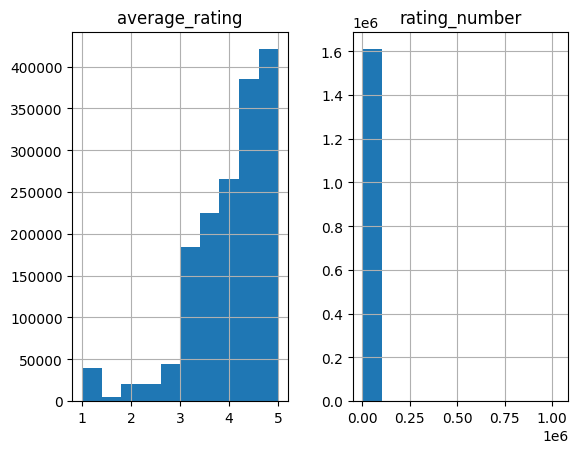

In [25]:
items.hist()

In [17]:
items.iloc[0]

main_category                                        All Electronics
title                         FS-1051 FATSHARK TELEPORTER V3 HEADSET
average_rating                                                   3.5
rating_number                                                      6
features                                                          []
description        [Teleporter V3 The “Teleporter V3” kit sets a ...
price                                                           None
images             [{'thumb': 'https://m.media-amazon.com/images/...
videos                                                            []
store                                                      Fat Shark
categories          [Electronics, Television & Video, Video Glasses]
details            {'Date First Available': 'August 2, 2014', 'Ma...
parent_asin                                               B00MCW7G9M
bought_together                                                  NaN
subtitle                          

In [18]:
# Per the dataset documentation: Note: Products with different colors, styles, sizes usually belong to the same parent ID. 
# The “asin” in previous Amazon datasets is actually parent ID. Please use parent ID to find product meta.
item = reviews.iloc[5].parent_asin
items[items.parent_asin == item]

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
1068151,Amazon Home,"Fancii Small Personal Desk USB Fan, Portable M...",4.0,11448,[Twin turbo Cyclone-Blade technology provides ...,[],15.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Good air, loud rattle', 'url': 'ht...",Fancii,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'Fancii', 'Color': 'Black', 'Electri...",B07CML419K,NaN,NaN,NaN


In [19]:
reviews[reviews.parent_asin == items.iloc[1].parent_asin]

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase


I can't load the entirety of the reviews in one shot... but I can fit every item in memory. So every review will be grounded to an item, but many reviews will be hidden. I don't think this matters for this project. If I want to fit more reviews, I can simply preprocess the data to rejct unneeded fields and (notably text fields) and dramatically reduce memory requirements. I can alternatively load only the critical columns, yes? 

### EDA

In [1]:
%set_env TF_USE_LEGACY_KERAS=True
%env

env: TF_USE_LEGACY_KERAS=True


{'CHROME_DESKTOP': 'code.desktop',
 'CLUTTER_DISABLE_MIPMAPPED_TEXT': '1',
 'CONDA_DEFAULT_ENV': 'base',
 'CONDA_EXE': '/home/grim/miniconda3/bin/conda',
 'CONDA_PREFIX': '/home/grim/miniconda3',
 'CONDA_PROMPT_MODIFIER': '(base) ',
 'CONDA_PYTHON_EXE': '/home/grim/miniconda3/bin/python',
 'CONDA_SHLVL': '1',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'DEBUGINFOD_URLS': 'https://debuginfod.ubuntu.com ',
 'DESKTOP_SESSION': 'ubuntu',
 'DISPLAY': ':1',
 'GDK_BACKEND': 'x11',
 'GDMSESSION': 'ubuntu',
 'GIO_LAUNCHED_DESKTOP_FILE': '/usr/share/applications/code.desktop',
 'GIO_LAUNCHED_DESKTOP_FILE_PID': '3487366',
 'GJS_DEBUG_OUTPUT': 'stderr',
 'GJS_DEBUG_TOPICS': 'JS ERROR;JS LOG',
 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated',
 'GNOME_SHELL_SESSION_MODE': 'ubuntu',
 'GPG_AGENT_INFO': '/run/user/1000/gnupg/S.gpg-agent:0:1',
 'GSM_SKIP_SSH_AGENT_WORKAROUND': 'true',
 'GTK_MODULES': 'gail:atk-bridge',
 'HOME': '/home/grim',
 'INVOCATION_ID': '803a37d0dfe64a10838df0bf

In [2]:
import pandas as pd
import tf_keras as keras 

2025-07-19 23:19:00.968361: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-19 23:19:00.975373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752981540.983326 1420605 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752981540.985636 1420605 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752981540.991867 1420605 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [139]:
reviews = pd.read_parquet("../data/2023/Electronics_min.parquet")
items = pd.read_parquet("../data/2023/meta_Electronics.parquet")

In [140]:
reviews

,rating,parent_asin,user_id,timestamp
0,3,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-07-18 22:58:37.948
1,1,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-06-20 18:42:29.731
2,5,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:23:37.534
3,5,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,2010-11-20 18:41:35.000
4,5,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2023-02-17 02:39:41.238
...,...,...,...,...
9999995,4,B0BR6FBPD9,AHG2SVUXNKVWEHVTVRZHIDRCWFQA,2021-07-07 17:10:50.418
9999996,5,B07DVRGM9M,AHG2SVUXNKVWEHVTVRZHIDRCWFQA,2018-07-19 14:04:49.157
9999997,5,B0B3TJMN8P,AGT6T3SMU577AW4KZOWCX7VIY3IQ,2022-08-26 16:29:27.240
9999998,5,B0B3158RQ2,AFY2KJ5YAVB77AAACLXEAHT4CHWQ,2022-12-06 20:21:24.745


In [141]:
items

,title,average_rating,rating_number,description,price,images,parent_asin
0,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[Teleporter V3 The “Teleporter V3” kit sets a ...,None,"[{'hi_res': None, 'large': 'https://m.media-am...",B00MCW7G9M
1,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,[HDMI In - HDMI Out],None,[{'hi_res': 'https://m.media-amazon.com/images...,B00YT6XQSE
2,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[],19.99,[{'hi_res': 'https://m.media-amazon.com/images...,B07SM135LS
3,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[],9.99,[{'hi_res': 'https://m.media-amazon.com/images...,B089CNGZCW
4,Motorola Droid X Essentials Combo Pack,3.8,64,[all Genuine High Quality Motorola Made Access...,14.99,"[{'hi_res': None, 'large': 'https://m.media-am...",B004E2Z88O
...,...,...,...,...,...,...,...
1610007,"Wintec FileMate Pro USB Flash Drive, 3FMUSB32G...",5.0,1,[--New in retail packaging --Fast USB 2.0 data...,None,[{'hi_res': 'https://m.media-amazon.com/images...,B003NUIU9M
1610008,Tsugar Noise Reduction Wireless Headphones Blu...,1.0,2,[Description: 100% brand new high quality 1.Hi...,None,"[{'hi_res': None, 'large': 'https://m.media-am...",B0BHVY33TL
1610009,"Hardshell Case for MacBook Pro (16-inch, 2021)...",4.6,11,[],None,[{'hi_res': 'https://m.media-amazon.com/images...,B09SQGRFFH
1610010,"FYY 12-13.3"" Laptop Sleeve Case Bag, PU Leathe...",4.0,35,[],None,[{'hi_res': 'https://m.media-amazon.com/images...,B091JWCSG5


We need to build a compact user-centric representation of preference, collapse review data into a sparse matrix of user -> item preferences. There are some heuristics that need to be applied in the process: 
1. users with few interactions are a very weak signal -- without associations with multiple products, we are not teaching the model about positive associations
2. products with few interactions are also a very weak signal -- we are looking to connect users and items that have tiny interaction graphs are not going to improve our macro-level predictions

In [142]:
# TODO: This should be a configuration option hyper parameter, we can relax this if training isn't suepr computationally expensive
min_ratings = 1000
items = items[items.rating_number > min_ratings]
len(items) 

42604

In [143]:
# The above item filtering serves to reduce the computational complexity as well as 
# reduce sparsity, before we filter reviews make sure we remove those associated with 
# dropped items
all_items = set(items.parent_asin)
reviews = reviews[reviews.parent_asin.isin(all_items)]
reviews.rename(columns={'parent_asin':'item_id'}, inplace=True)

/tmp/ipykernel_1420605/1979523271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.rename(columns={'parent_asin':'item_id'}, inplace=True)


In [146]:
users = reviews.groupby(['user_id']).rating.count()
users = pd.DataFrame(users).reset_index()
users.rename(columns={'rating':'ratings'}, inplace=True)

In [148]:
# This is a configuration parameter, as above ... relax if we don't have issues with compute
min_reviews = 10
users = users[users.ratings > min_reviews] 
users

,user_id,ratings
35,AE224LWIR4ZDJLRKORFHMJGABP6Q,12
41,AE2254CLKQFGLVCWHFRAMSW4CNZQ,19
45,AE225JSR3YVYTIDQSVM4P5OIPOCQ,15
119,AE22D3CEKC473IRRXO6GV3FFVKWA,14
132,AE22E3XNIF5TITEAJXHT55LD5QUQ,16
...,...,...
1717145,AHZZPHHIFD2ZYJ2PIC2C7ALO6TIA,14
1717221,AHZZVAZOOI2VLLRPY44BRT66RAVA,17
1717243,AHZZWWMHREWAUMXKST4AJRUAEYOQ,11
1717247,AHZZXDXLVY3NXHX6H3RV65N7AOOA,21


❗in the notebook, ratings are thresholded ... do we need to follow suit? what are the ramifications if we don't? OH... in the notebook, a click is an interaction, there's no middle ground. the network is going to operate on 0s or 1s. by leaving low reviews in our matrix, the network would learn to recommend things users have interacted with, but not necessarily positively. our case is the same, a review is an interaction. we're aiming to recommend, and we should not want to recommend low reviews. so filter... 

In [151]:
#TODO: decide if we need to keep the low reviews around 
reviews = reviews[reviews.rating >= 3]

In [152]:
# Discard reviews by users outside our core group 
reviews = reviews[reviews.user_id.isin(set(users.user_id))]

In [153]:
reviews

,rating,item_id,user_id,timestamp
80,4,B07Q585X37,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:19:44.165
81,4,B07P97SHQP,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:17:22.921
82,5,B07B3TX6MF,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:15:20.998
85,4,B07F71KFMQ,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2019-10-16 06:50:36.737
87,4,B07P7KG4TJ,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2019-10-16 06:43:25.557
...,...,...,...,...
9999530,5,B07TTNBC62,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-12-16 22:44:01.368
9999531,5,B01LVVG5XS,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-06-06 23:30:01.780
9999533,5,B07GPGVYGX,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-04-20 18:13:32.864
9999534,5,B0792K2BK6,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-02-05 04:54:59.478


In [154]:
matrix_size = len(users) * len(items)
matrix_size

2431751112

In [155]:
from recommenders.datasets.sparse import AffinityMatrix

In [156]:
import numpy as np 
import pandas as pd 

In [157]:
reviews.columns

Index(['rating', 'item_id', 'user_id', 'timestamp'], dtype='object')

In [158]:
reviews

,rating,item_id,user_id,timestamp
80,4,B07Q585X37,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:19:44.165
81,4,B07P97SHQP,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:17:22.921
82,5,B07B3TX6MF,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2020-12-03 06:15:20.998
85,4,B07F71KFMQ,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2019-10-16 06:50:36.737
87,4,B07P7KG4TJ,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,2019-10-16 06:43:25.557
...,...,...,...,...
9999530,5,B07TTNBC62,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-12-16 22:44:01.368
9999531,5,B01LVVG5XS,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-06-06 23:30:01.780
9999533,5,B07GPGVYGX,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-04-20 18:13:32.864
9999534,5,B0792K2BK6,AF7SGANS57DTNVLTAJBPKG2VU52A,2019-02-05 04:54:59.478


In [ ]:
from recommenders.datasets.python_splitters import python_stratified_split

# Split, ensuring we have all items represented in each of these sets, i.e. 
# each item we want to predict needs to be present at training time

train, test, val = python_stratified_split(
    data=reviews,
    ratio=[.9, .05, .05],
    filter_by="item", 
    col_user='user_id', 
    col_item='item_id') 

In [161]:
print(train.shape, test.shape, val.shape)

(892946, 4) (51668, 4) (46855, 4)


array(['0062970704', '0345803507', '0525566651', ..., 'B0CH7XX85M',
       'B0CH817Z21', 'B0CJ2FDZD9'], dtype=object)

In [ ]:
#to use standard names across the analysis 
header = {
        "col_user": "user_id",
        "col_item": "item_id",
        "col_rating": "rating",
        # Unclear why this doesn't also eat a timestamp, but many of the functions that split temporally use, fortunately 
        # the column 'timestamp' (i.e. DEFAULT_TIMESTAMP_COL='timestamp') so I think we're fine. 
        # "col_timestamp" : "timestamp"
    }

ui_matrix = AffinityMatrix(df=reviews, **header)

In [21]:
# This generates a sparse array of user vectors, aka user-item matrix
# X[0] is the first user in the list, with entries for all items known when the matrix was constructed in that row
X, _, _ = ui_matrix.gen_affinity_matrix()

In [22]:
X.shape

(1351, 92292)

In [36]:
from recommenders.datasets.python_splitters import numpy_stratified_split

X_train, X_test = numpy_stratified_split(X) 

In [24]:
#TODO: decide whether we need to binarize here
from recommenders.utils.python_utils import binarize
Xb = binarize(X, 3)

In [30]:
# TODO: Make sure this is reported during training/configuration
sparsity = np.count_nonzero(Xb)/(Xb.shape[0]*Xb.shape[1])
sparsity

0.0013188998853219801

In [33]:
from recommenders.models.vae.standard_vae import StandardVAE

In [30]:
X_train.shape

(1351, 99429)

In [31]:
X_test.shape

(1351, 99429)

In [58]:
X.shape

(1351, 92292)

In [34]:
keras.__version__ 

'2.19.0'

## Model Design 

In [35]:
model = StandardVAE(
    n_users = X.shape[0], 
    original_dim = X.shape[1],
    intermediate_dim=250, 
    latent_dim=50, 
    n_epochs=1, 
    batch_size=1, 
    k=10, 
    verbose=1, 
    seed=4, 
    save_path="models/svae.hdf5", 
    drop_encoder=0.5, 
    drop_decoder=0.5, 
    annealing=False, 
    beta=1.0) 

I0000 00:00:1752982001.723465 1420605 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17324 MB memory:  -> device: 0, name: NVIDIA RTX A5500, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
model.fit(x_train=Xb, 
          x_valid=X_val, 
          x_val_tr=
          x_val_te=
          mapper=ui_matrix
          )

TypeError: StandardVAE.fit() missing 4 required positional arguments: 'x_valid', 'x_val_tr', 'x_val_te', and 'mapper'

Managing text-based reviews at this scale could be a challenge, and I'd like to steer clear of LLMs for this effort. We could do an embedding on the review and use that for similarity, but we have pretty rich item data. Perhaps let's ignore the collaborative aspect here and build a shopping interface that: 
- surfaces the most popular items, and encourages you to add items to your shopping cart for a big discount/promo
- based on clicks and cart items, improves the recommendations and surfaces new products

We can use an autoencoder to accept a sparse matrix of users and items, learn to reproduce that matrix, and in so doing support prediction on missing values. However, this matrix is of size users x items, which here is 1.8e7 x 1.6e6 = 28,125,000,000 KB (best-case, higher if stored as np floats) ~= 26 TB !! WTF. 
- In the standard VAE example (https://github.com/recommenders-team/recommenders/blob/main/examples/02_model_collaborative_filtering/standard_vae_deep_dive.ipynb) the clicks are turned into a histogram for each user ... so we have n_user vector of length n_items... then I guess each of these is a training sample. The VAE presumably learns, given a sparse user vector, to predict every rating. This takes the complexity down and gives us a training set we can iterate over. 

Let's avoid any distributional pressure (present in VAE, SVAE, disentangled VAE) and go for a basic autoencoder using the strategy laid out above, i.e.

## Autoencoder Prototype

In [ ]:
import torch 
import pandas as pd 
import torch
from tqdm import tqdm
import os
import math 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import wandb

In [ ]:
class Autoencoder(nn.Module):
    """
    Autoencoder

    NOTE: with cues from https://www.geeksforgeeks.org/deep-learning/implementing-an-autoencoder-in-pytorch/
    """

    def __init__(self, dims=1000):
        """
        Initialize a new object 
        """
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(dims, 500),
            nn.Linear(500, 75),
        )
        self.decoder = nn.Sequential(
            nn.Linear(75, 500),
            nn.Linear(500, dims),
        )

    def forward(self, x):
        """
        Implement our forward pass 
        """
        h = self.encoder(x) 
        r = self.decoder(h)

        return r

In [ ]:
class DeepCartDataset(torch.utils.data.Dataset): 
    """
    Custom pytorch-compatible dataset. Adapted from 
    https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files
    """
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): 

        self.img_labels = pd.read_csv(annotations_file)

        #TODO: implement

    def __len__(self): 
        return len(self.img_labels) 
    
    def __getitem__(self, idx): 
        #TODO: implement
        pass

In [1]:
def get_data_loader(batch_size=5, shuffle=True): 
    """
    Retrieve a pytorch-style dataloader 
    """

    #TODO: implement
    #transform = transforms.Compose([
    #     transforms.ConvertImageDtype(torch.float),
    #     transforms.Normalize(mean=[0.5], std=[0.5])
    #])

    #data = DeepCartDataset(transform=transform)
    #loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=shuffle)
    
    #return loader
    pass

In [2]:
def train(loader, model, loss_interval=20, epochs=2, lr=0.01, momentum=0.9):
    """
    Train the model with the provided dataset

    NOTE: this is a similar training loop as we used for our vision model in the 
    the vision project, forward pass
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    train_loss = []

    tqdm.write(f"Starting training run...")    
    # TODO: configure WandB
    # see https://docs.wandb.ai/guides/integrations/pytorch/
    config = {}
    run = wandb.init(config=config) 

    model.train()
    model = model.to(device)
    
    loss_fn = nn.CrossEntropyLoss()

    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    for epoch in range(epochs):

        running_loss = 0.0
        for i, data in enumerate(loader):

            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            # collect metrics
            running_loss += loss.item()

            if (i % loss_interval) == (loss_interval - 1): 
                train_loss.append(running_loss / loss_interval)
                tqdm.write(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / loss_interval:.3f}")
                running_loss = 0 
    
    tqdm.write("Training complete!") 

    return train_loss 